In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import os

In [9]:
print(os.listdir("Desktop/facialPoints"))

['IdLookupTable.csv', 'SampleSubmission.csv', 'test.csv', 'training.csv']


In [10]:
train_dir="Desktop/facialPoints/training.csv"
test_dir="Desktop/facialPoints/test.csv"
look_dir="Desktop/facialPoints/IdLookupTable.csv"
train_data=pd.read_csv(train_dir)
test_data = pd.read_csv(test_dir)
lookup_data = pd.read_csv(look_dir)
lookup_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [11]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [12]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [15]:
train_data.fillna(method="ffill",inplace=True)

In [16]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [17]:
imag = []
for i in range(7049):
    img = train_data["Image"][i].split(' ')
    img = ['0' if x == ' ' else x for x in img]
    imag.append(img)

In [18]:
#reshape it into float
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1,96,96)

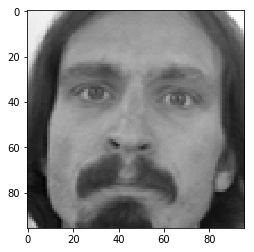

In [19]:
plt.imshow(X_train[0],cmap = 'gray')
plt.show()

In [20]:
#now lets separate labels
training = train_data.drop('Image',axis = 1)
y_train = []
for i in range(7049):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float') 

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,Dropout

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
model.compile(optimizer = 'adam',loss = 'mse',metrics=['mae','accuracy'])

In [22]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 5s 950us/step - loss: 22772.1677 - mean_absolute_error: 88.9299 - acc: 0.0388 - val_loss: 1819.8984 - val_mean_absolute_error: 37.8686 - val_acc: 0.0000e+00
Epoch 2/500
5639/5639 [==============================] - 2s 407us/step - loss: 1188.1929 - mean_absolute_error: 28.1561 - acc: 0.0552 - val_loss: 337.2130 - val_mean_absolute_error: 14.4663 - val_acc: 0.1333
Epoch 3/500
5639/5639 [==============================] - 2s 425us/step - loss: 412.8500 - mean_absolute_error: 15.5766 - acc: 0.2596 - val_loss: 287.7635 - val_mean_absolute_error: 13.6938 - val_acc: 0.5730
Epoch 4/500
5639/5639 [==============================] - 3s 513us/step - loss: 300.6111 - mean_absolute_error: 13.0961 - acc: 0.3103 - val_loss: 300.8522 - val_mean_absolute_error: 14.2159 - val_acc: 0.5213
Epoch 5/500
5639/5639 [==============================] - 3s 477us/step - loss: 259.0319 - mean_absolute_error: 12.10

5639/5639 [==============================] - 2s 396us/step - loss: 107.8174 - mean_absolute_error: 7.6871 - acc: 0.5879 - val_loss: 109.1097 - val_mean_absolute_error: 7.7603 - val_acc: 0.6865
Epoch 41/500
5639/5639 [==============================] - 2s 393us/step - loss: 128.2132 - mean_absolute_error: 8.3668 - acc: 0.4616 - val_loss: 135.4537 - val_mean_absolute_error: 8.6970 - val_acc: 0.4936
Epoch 42/500
5639/5639 [==============================] - 2s 390us/step - loss: 104.6611 - mean_absolute_error: 7.6035 - acc: 0.5217 - val_loss: 188.9985 - val_mean_absolute_error: 10.8142 - val_acc: 0.6816
Epoch 43/500
5639/5639 [==============================] - 2s 429us/step - loss: 111.6320 - mean_absolute_error: 7.8579 - acc: 0.5223 - val_loss: 120.9226 - val_mean_absolute_error: 8.0965 - val_acc: 0.5206
Epoch 44/500
5639/5639 [==============================] - 2s 427us/step - loss: 113.0775 - mean_absolute_error: 7.8838 - acc: 0.5256 - val_loss: 132.3708 - val_mean_absolute_error: 8.7579 

Epoch 80/500
5639/5639 [==============================] - 2s 399us/step - loss: 131.8102 - mean_absolute_error: 8.1367 - acc: 0.5577 - val_loss: 130.4023 - val_mean_absolute_error: 8.5714 - val_acc: 0.6716
Epoch 81/500
5639/5639 [==============================] - 2s 405us/step - loss: 123.6648 - mean_absolute_error: 7.8052 - acc: 0.5496 - val_loss: 168.8852 - val_mean_absolute_error: 10.0998 - val_acc: 0.6865
Epoch 82/500
5639/5639 [==============================] - 2s 396us/step - loss: 113.6476 - mean_absolute_error: 7.6243 - acc: 0.5568 - val_loss: 153.8776 - val_mean_absolute_error: 9.4729 - val_acc: 0.6865
Epoch 83/500
5639/5639 [==============================] - 2s 436us/step - loss: 115.9953 - mean_absolute_error: 7.5482 - acc: 0.5540 - val_loss: 171.0337 - val_mean_absolute_error: 10.2103 - val_acc: 0.6865
Epoch 84/500
5639/5639 [==============================] - 2s 426us/step - loss: 111.8167 - mean_absolute_error: 7.4807 - acc: 0.5623 - val_loss: 102.2026 - val_mean_absolute_

Epoch 120/500
5639/5639 [==============================] - 2s 426us/step - loss: 100.0496 - mean_absolute_error: 6.9059 - acc: 0.5600 - val_loss: 175.3787 - val_mean_absolute_error: 10.5219 - val_acc: 0.4461
Epoch 121/500
5639/5639 [==============================] - 2s 410us/step - loss: 100.2121 - mean_absolute_error: 7.0370 - acc: 0.5359 - val_loss: 119.3997 - val_mean_absolute_error: 8.0853 - val_acc: 0.6390
Epoch 122/500
5639/5639 [==============================] - 3s 445us/step - loss: 125.7696 - mean_absolute_error: 8.0350 - acc: 0.5017 - val_loss: 110.2234 - val_mean_absolute_error: 7.7468 - val_acc: 0.4872
Epoch 123/500
5639/5639 [==============================] - 3s 469us/step - loss: 100.0795 - mean_absolute_error: 6.9451 - acc: 0.5616 - val_loss: 100.9678 - val_mean_absolute_error: 7.4362 - val_acc: 0.5355
Epoch 124/500
5639/5639 [==============================] - 3s 517us/step - loss: 105.5654 - mean_absolute_error: 7.2922 - acc: 0.5439 - val_loss: 176.6085 - val_mean_absol

Epoch 160/500
5639/5639 [==============================] - 2s 439us/step - loss: 81.8322 - mean_absolute_error: 6.4292 - acc: 0.5834 - val_loss: 123.0268 - val_mean_absolute_error: 8.4784 - val_acc: 0.6830
Epoch 161/500
5639/5639 [==============================] - 3s 456us/step - loss: 85.4671 - mean_absolute_error: 6.3666 - acc: 0.5921 - val_loss: 74.8184 - val_mean_absolute_error: 6.2149 - val_acc: 0.6823
Epoch 162/500
5639/5639 [==============================] - 2s 415us/step - loss: 82.5118 - mean_absolute_error: 6.4127 - acc: 0.5653 - val_loss: 76.0277 - val_mean_absolute_error: 6.2672 - val_acc: 0.6610
Epoch 163/500
5639/5639 [==============================] - 2s 405us/step - loss: 81.3208 - mean_absolute_error: 6.2846 - acc: 0.5801 - val_loss: 93.6537 - val_mean_absolute_error: 7.0930 - val_acc: 0.6844
Epoch 164/500
5639/5639 [==============================] - 2s 421us/step - loss: 89.3306 - mean_absolute_error: 6.6044 - acc: 0.5889 - val_loss: 140.6206 - val_mean_absolute_error

Epoch 200/500
5639/5639 [==============================] - 2s 429us/step - loss: 56.1870 - mean_absolute_error: 5.3513 - acc: 0.5868 - val_loss: 54.7407 - val_mean_absolute_error: 5.2246 - val_acc: 0.6865
Epoch 201/500
5639/5639 [==============================] - 2s 422us/step - loss: 49.9883 - mean_absolute_error: 5.0360 - acc: 0.6045 - val_loss: 57.9117 - val_mean_absolute_error: 5.3634 - val_acc: 0.6865
Epoch 202/500
5639/5639 [==============================] - ETA: 0s - loss: 50.8974 - mean_absolute_error: 5.0412 - acc: 0.60 - 2s 413us/step - loss: 50.9527 - mean_absolute_error: 5.0431 - acc: 0.6056 - val_loss: 51.4681 - val_mean_absolute_error: 5.0681 - val_acc: 0.6865
Epoch 203/500
5639/5639 [==============================] - 2s 432us/step - loss: 49.8855 - mean_absolute_error: 4.9608 - acc: 0.6035 - val_loss: 90.8993 - val_mean_absolute_error: 7.3390 - val_acc: 0.6844
Epoch 204/500
5639/5639 [==============================] - 2s 422us/step - loss: 53.8023 - mean_absolute_error: 

Epoch 240/500
5639/5639 [==============================] - 2s 414us/step - loss: 26.0665 - mean_absolute_error: 3.6351 - acc: 0.6015 - val_loss: 25.9852 - val_mean_absolute_error: 3.6011 - val_acc: 0.6844
Epoch 241/500
5639/5639 [==============================] - 2s 403us/step - loss: 25.6444 - mean_absolute_error: 3.5888 - acc: 0.5982 - val_loss: 39.0380 - val_mean_absolute_error: 4.5418 - val_acc: 0.6865
Epoch 242/500
5639/5639 [==============================] - 2s 400us/step - loss: 21.5864 - mean_absolute_error: 3.2723 - acc: 0.6065 - val_loss: 25.3040 - val_mean_absolute_error: 3.3526 - val_acc: 0.6865
Epoch 243/500
5639/5639 [==============================] - 2s 426us/step - loss: 21.5896 - mean_absolute_error: 3.2585 - acc: 0.6113 - val_loss: 25.6151 - val_mean_absolute_error: 3.4875 - val_acc: 0.6730
Epoch 244/500
5639/5639 [==============================] - 3s 450us/step - loss: 19.9091 - mean_absolute_error: 3.1202 - acc: 0.5935 - val_loss: 26.1255 - val_mean_absolute_error: 

Epoch 280/500
5639/5639 [==============================] - 2s 397us/step - loss: 11.7349 - mean_absolute_error: 2.3038 - acc: 0.6824 - val_loss: 10.6062 - val_mean_absolute_error: 2.1200 - val_acc: 0.6397
Epoch 281/500
5639/5639 [==============================] - 2s 396us/step - loss: 11.5259 - mean_absolute_error: 2.2718 - acc: 0.6872 - val_loss: 12.1939 - val_mean_absolute_error: 2.2787 - val_acc: 0.6624
Epoch 282/500
5639/5639 [==============================] - 2s 404us/step - loss: 11.2258 - mean_absolute_error: 2.2433 - acc: 0.6921 - val_loss: 10.1545 - val_mean_absolute_error: 2.0328 - val_acc: 0.6489
Epoch 283/500
5639/5639 [==============================] - 2s 427us/step - loss: 11.6788 - mean_absolute_error: 2.3074 - acc: 0.6941 - val_loss: 9.5680 - val_mean_absolute_error: 1.9233 - val_acc: 0.6780
Epoch 284/500
5639/5639 [==============================] - 2s 430us/step - loss: 10.9214 - mean_absolute_error: 2.2004 - acc: 0.6927 - val_loss: 9.3025 - val_mean_absolute_error: 1.

5639/5639 [==============================] - 2s 408us/step - loss: 8.4247 - mean_absolute_error: 1.7762 - acc: 0.7108 - val_loss: 7.4475 - val_mean_absolute_error: 1.7732 - val_acc: 0.6894
Epoch 321/500
5639/5639 [==============================] - 2s 412us/step - loss: 8.6389 - mean_absolute_error: 1.8316 - acc: 0.7143 - val_loss: 5.9739 - val_mean_absolute_error: 1.3507 - val_acc: 0.6830
Epoch 322/500
5639/5639 [==============================] - 2s 408us/step - loss: 8.6330 - mean_absolute_error: 1.8292 - acc: 0.7030 - val_loss: 6.3803 - val_mean_absolute_error: 1.4756 - val_acc: 0.6887
Epoch 323/500
5639/5639 [==============================] - 2s 438us/step - loss: 8.4649 - mean_absolute_error: 1.7969 - acc: 0.7124 - val_loss: 5.5563 - val_mean_absolute_error: 1.2509 - val_acc: 0.6922
Epoch 324/500
5639/5639 [==============================] - 2s 441us/step - loss: 8.5174 - mean_absolute_error: 1.8015 - acc: 0.7117 - val_loss: 5.8794 - val_mean_absolute_error: 1.3643 - val_acc: 0.6922

5639/5639 [==============================] - 2s 432us/step - loss: 9.6140 - mean_absolute_error: 1.9667 - acc: 0.6171 - val_loss: 9.4354 - val_mean_absolute_error: 2.2360 - val_acc: 0.6681
Epoch 361/500
5639/5639 [==============================] - 3s 450us/step - loss: 9.5159 - mean_absolute_error: 1.9545 - acc: 0.6451 - val_loss: 5.2316 - val_mean_absolute_error: 1.2124 - val_acc: 0.6780
Epoch 362/500
5639/5639 [==============================] - 3s 474us/step - loss: 9.0469 - mean_absolute_error: 1.8563 - acc: 0.6767 - val_loss: 5.2576 - val_mean_absolute_error: 1.1939 - val_acc: 0.6738
Epoch 363/500
5639/5639 [==============================] - 2s 415us/step - loss: 9.7381 - mean_absolute_error: 2.0101 - acc: 0.6608 - val_loss: 5.1798 - val_mean_absolute_error: 1.1669 - val_acc: 0.6801
Epoch 364/500
5639/5639 [==============================] - 2s 402us/step - loss: 9.1722 - mean_absolute_error: 1.8762 - acc: 0.6703 - val_loss: 9.9328 - val_mean_absolute_error: 2.3697 - val_acc: 0.6830

Epoch 400/500
5639/5639 [==============================] - 2s 434us/step - loss: 10.0650 - mean_absolute_error: 2.0189 - acc: 0.6056 - val_loss: 5.8385 - val_mean_absolute_error: 1.4450 - val_acc: 0.6865
Epoch 401/500
5639/5639 [==============================] - 2s 428us/step - loss: 10.0768 - mean_absolute_error: 2.0232 - acc: 0.6056 - val_loss: 5.7981 - val_mean_absolute_error: 1.4482 - val_acc: 0.6865
Epoch 402/500
5639/5639 [==============================] - 2s 402us/step - loss: 10.0660 - mean_absolute_error: 2.0218 - acc: 0.6056 - val_loss: 5.8031 - val_mean_absolute_error: 1.4341 - val_acc: 0.6865
Epoch 403/500
5639/5639 [==============================] - 2s 414us/step - loss: 10.0598 - mean_absolute_error: 2.0165 - acc: 0.6056 - val_loss: 5.9703 - val_mean_absolute_error: 1.4718 - val_acc: 0.6865
Epoch 404/500
5639/5639 [==============================] - 2s 406us/step - loss: 10.0647 - mean_absolute_error: 2.0244 - acc: 0.6056 - val_loss: 5.8549 - val_mean_absolute_error: 1.450

5639/5639 [==============================] - 3s 459us/step - loss: 10.0680 - mean_absolute_error: 2.0319 - acc: 0.6052 - val_loss: 5.8246 - val_mean_absolute_error: 1.4275 - val_acc: 0.6865
Epoch 441/500
5639/5639 [==============================] - 2s 421us/step - loss: 10.0649 - mean_absolute_error: 2.0176 - acc: 0.6052 - val_loss: 5.9280 - val_mean_absolute_error: 1.4690 - val_acc: 0.6865
Epoch 442/500
5639/5639 [==============================] - 2s 420us/step - loss: 10.0698 - mean_absolute_error: 2.0169 - acc: 0.6052 - val_loss: 6.0651 - val_mean_absolute_error: 1.5136 - val_acc: 0.6865
Epoch 443/500
5639/5639 [==============================] - 2s 421us/step - loss: 10.0792 - mean_absolute_error: 2.0346 - acc: 0.6052 - val_loss: 5.8711 - val_mean_absolute_error: 1.4176 - val_acc: 0.6865
Epoch 444/500
5639/5639 [==============================] - 2s 420us/step - loss: 10.0746 - mean_absolute_error: 2.0190 - acc: 0.6052 - val_loss: 5.8113 - val_mean_absolute_error: 1.4352 - val_acc: 0

5639/5639 [==============================] - 2s 408us/step - loss: 10.0681 - mean_absolute_error: 2.0259 - acc: 0.6052 - val_loss: 5.7982 - val_mean_absolute_error: 1.4387 - val_acc: 0.6865
Epoch 481/500
5639/5639 [==============================] - 2s 397us/step - loss: 10.0679 - mean_absolute_error: 2.0230 - acc: 0.6052 - val_loss: 5.8106 - val_mean_absolute_error: 1.4278 - val_acc: 0.6865
Epoch 482/500
5639/5639 [==============================] - 2s 406us/step - loss: 10.0775 - mean_absolute_error: 2.0281 - acc: 0.6052 - val_loss: 5.7833 - val_mean_absolute_error: 1.4128 - val_acc: 0.6865
Epoch 483/500
5639/5639 [==============================] - 2s 399us/step - loss: 10.0680 - mean_absolute_error: 2.0192 - acc: 0.6052 - val_loss: 5.6563 - val_mean_absolute_error: 1.3837 - val_acc: 0.6865
Epoch 484/500
5639/5639 [==============================] - 2s 403us/step - loss: 10.0653 - mean_absolute_error: 2.0161 - acc: 0.6052 - val_loss: 5.9019 - val_mean_absolute_error: 1.4528 - val_acc: 0

In [27]:
#now lets prepare out test data
timage  = []
for j in range(1783):
    imgi = test_data['Image'][j].split(' ')
    imgi = ['0' if x == '' else x for x in imgi]
    timage.append(imgi)
timage = np.array(timage,dtype = 'float')

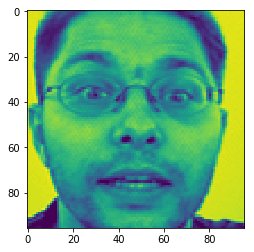

In [28]:
X_test = timage.reshape(-1,96,96)
plt.imshow(X_test[0])
plt.show()

In [29]:
#lets Predict our result
y_pred = model.predict(X_test)

In [30]:
df = pd.DataFrame(y_pred)
df.columns = train_data.columns[0:30]
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782
left_eye_center_x,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,...,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708,66.475708
left_eye_center_y,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,...,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485,37.776485
right_eye_center_x,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,...,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709,30.231709
right_eye_center_y,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,...,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552,38.072552
left_eye_inner_corner_x,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,...,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769,59.211769


In [32]:
submit = lookup_data

for i in range(submit.shape[0]):
    row = submit.loc[i,'FeatureName']
    col = submit.loc[i,'ImageId'] - 1
    submit.loc[i,'Location'] = df.loc[row, col]
submit = submit.drop(['ImageId', 'FeatureName'],axis=1)
submit.head()

,RowId,Location
0,1,66.475708
1,2,37.776485
2,3,30.231709
3,4,38.072552
4,5,59.211769
